<a href="https://colab.research.google.com/github/Mandlez/Finance/blob/main/Corr%C3%A9lation_actifs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bookmap

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytz
from datetime import datetime, timedelta

In [ ]:
tickers = ['NQ=F', 'ES=F', 'YM=F', '^FCHI', '^VIX', 'DX-Y.NYB', 'GC=F' , 'CL=F', '6E=F']

In [ ]:
data = yf.download(tickers, start='2014-01-01', end='2024-06-01')['Adj Close']

[*********************100%%**********************]  9 of 9 completed


In [ ]:
returns = data.pct_change().dropna()

In [ ]:
corr_matrix = returns.corr()

In [ ]:
corr_matrix = corr_matrix.loc[tickers, tickers]

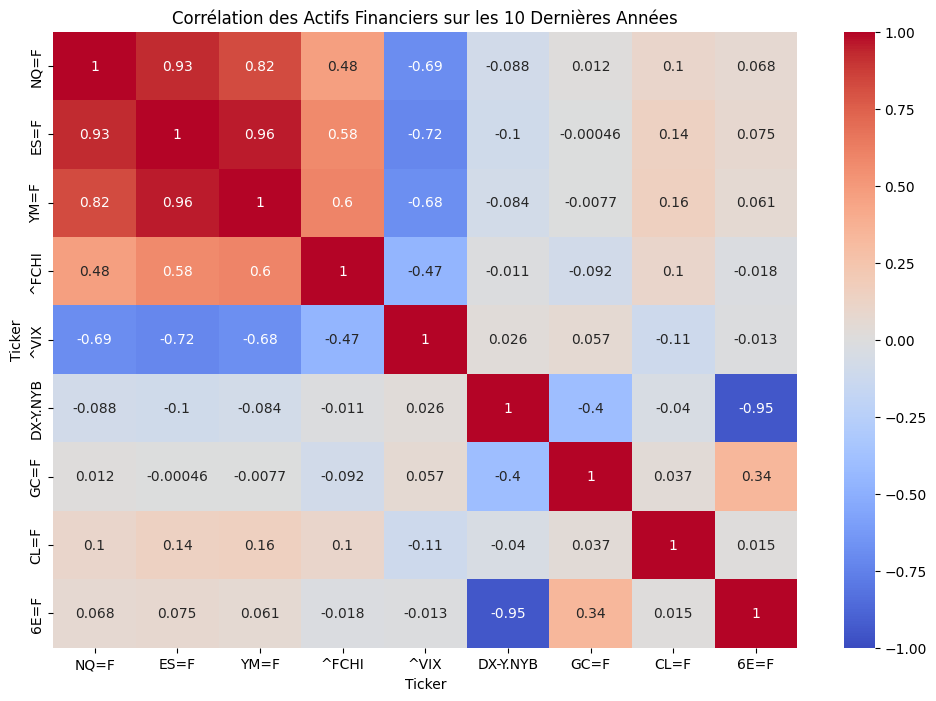

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corrélation des Actifs Financiers sur les 10 Dernières Années')
plt.show()

In [ ]:
# Définir la date de début et de fin pour les 7 derniers jours
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

In [ ]:
data2 = yf.download(tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), interval='1m')

[*********************100%%**********************]  9 of 9 completed


In [ ]:
data2.index = data2.index.tz_convert('UTC')

In [ ]:
# Définir les timezones
paris = pytz.timezone('Europe/Paris')
ny = pytz.timezone('America/New_York')

In [ ]:
data_paris = data2.copy()
data_us_market = data2.copy()

# Convertir l'index en heure de Paris pour la première matrice
data_paris.index = data_paris.index.tz_convert(paris)

# Convertir l'index en heure de New York pour la deuxième matrice
data_us_market.index = data_us_market.index.tz_convert(ny)


In [ ]:
# Séparer les données en deux fenêtres de temps
# 1. De minuit à minuit heure française
data_paris = data_paris.between_time('00:00', '23:59')

# 2. De l'ouverture des marchés américains (15h30 heure française, soit 09h30 heure de New York) à la clôture (22h00 heure française, soit 16h00 heure de New York)
data_us_market = data_us_market.between_time('09:30', '16:00')

In [ ]:
# Calculer les rendements journaliers pour chaque fenêtre de temps
returns_paris = data_paris['Adj Close'].pct_change().dropna()
returns_us_market = data_us_market['Adj Close'].pct_change().dropna()

In [ ]:
# Calculer les matrices de corrélation
corr_matrix_paris = returns_paris.corr()
corr_matrix_us_market = returns_us_market.corr()


In [ ]:
# Réorganiser les matrices de corrélation selon l'ordre des tickers spécifiés
corr_matrix_paris = corr_matrix_paris.loc[tickers, tickers]
corr_matrix_us_market = corr_matrix_us_market.loc[tickers, tickers]

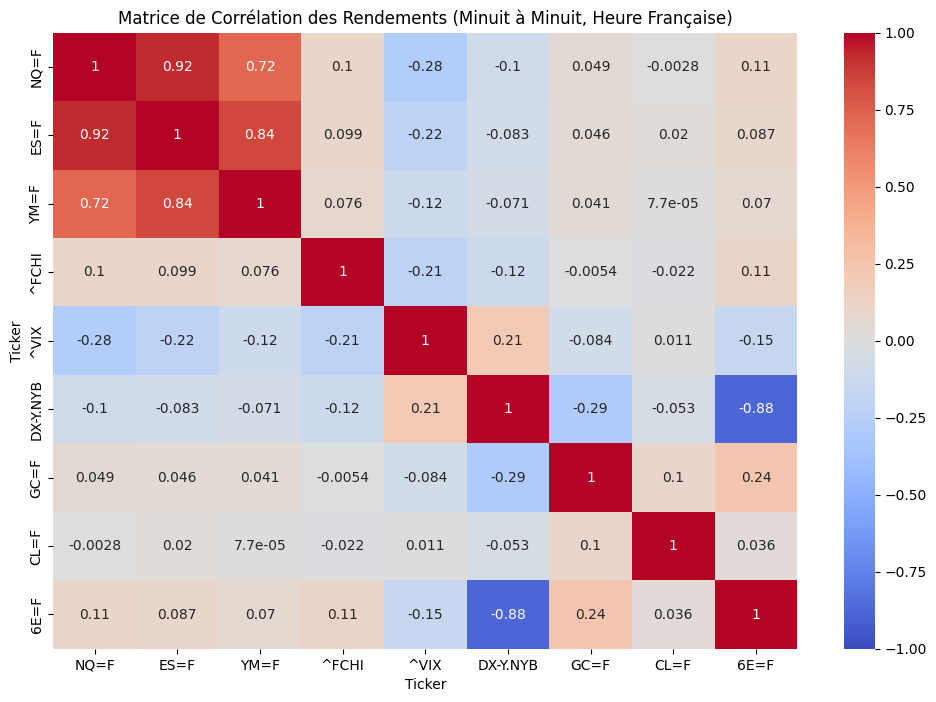

In [ ]:
# Afficher la matrice de corrélation pour la fenêtre de minuit à minuit
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_paris, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Rendements (Minuit à Minuit, Heure Française)')
plt.show()

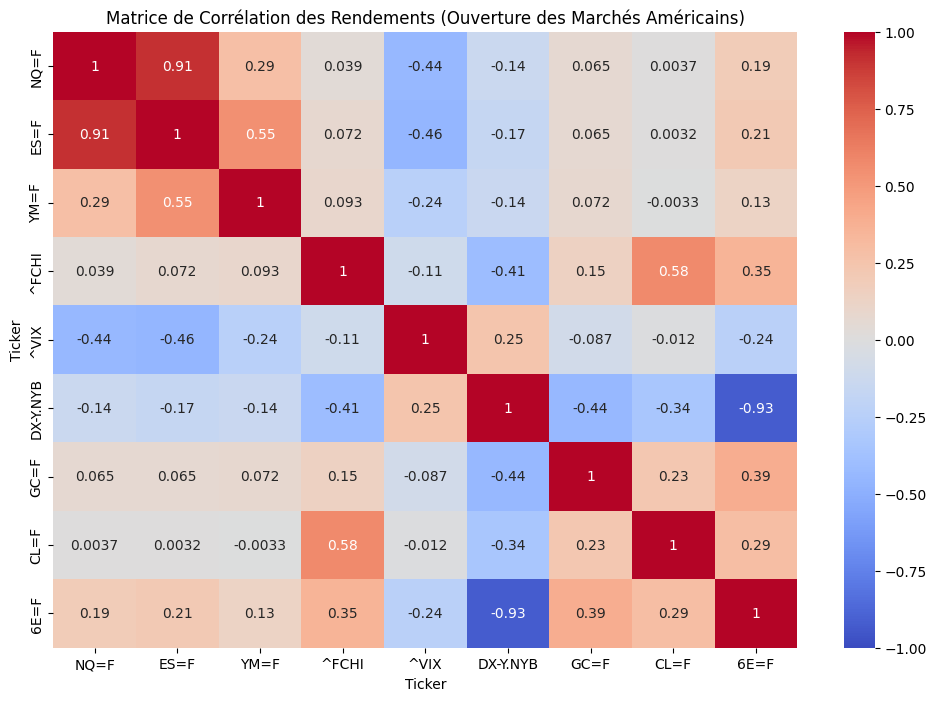

In [ ]:
# Afficher la matrice de corrélation pour la fenêtre d'ouverture des marchés américains
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_us_market, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Rendements (Ouverture des Marchés Américains)')
plt.show()